## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

## Data Load

In [ ]:
df = pd.read_csv('MARJANTA_DATA_CW3.csv', encoding='ISO-8859-1')

df.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


In [ ]:
df.isnull().sum()

Ref                                    0
id                                     0
Gender                                 0
Satisfied                              0
Age                                    0
Age Band                               0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Destination                            0
Continent                              0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness     

In [ ]:
df = df.dropna()

df.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


## Preprocessing

### Encoding

In [ ]:
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])

df['Satisfied'] = df['Satisfied'].map({'Y': 1, 'N': 0})

df['Class'] = label_encoder.fit_transform(df['Class'])
df['Type of Travel'] = label_encoder.fit_transform(df['Type of Travel'])

### Scaling

In [ ]:
scaler = StandardScaler()
df['Flight Distance'] = scaler.fit_transform(df[['Flight Distance']])
df['Departure Delay in Minutes'] = scaler.fit_transform(df[['Departure Delay in Minutes']])
df['Arrival Delay in Minutes'] = scaler.fit_transform(df[['Arrival Delay in Minutes']])

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
corr_matrix = df_encoded.corr()

In [ ]:
corr_unstacked = corr_matrix.abs().unstack().reset_index()
corr_unstacked.columns = ['Feature1', 'Feature2', 'Correlation']

corr_unstacked = corr_unstacked[corr_unstacked['Feature1'] != corr_unstacked['Feature2']]

corr_unstacked = corr_unstacked.drop_duplicates(subset=['Correlation'], keep='first')

top_10_corr = corr_unstacked.nlargest(10, 'Correlation')

top_features = set(top_10_corr['Feature1']).union(set(top_10_corr['Feature2']))

top_corr_matrix = corr_matrix.loc[top_features, top_features]

## Correlation Matrix

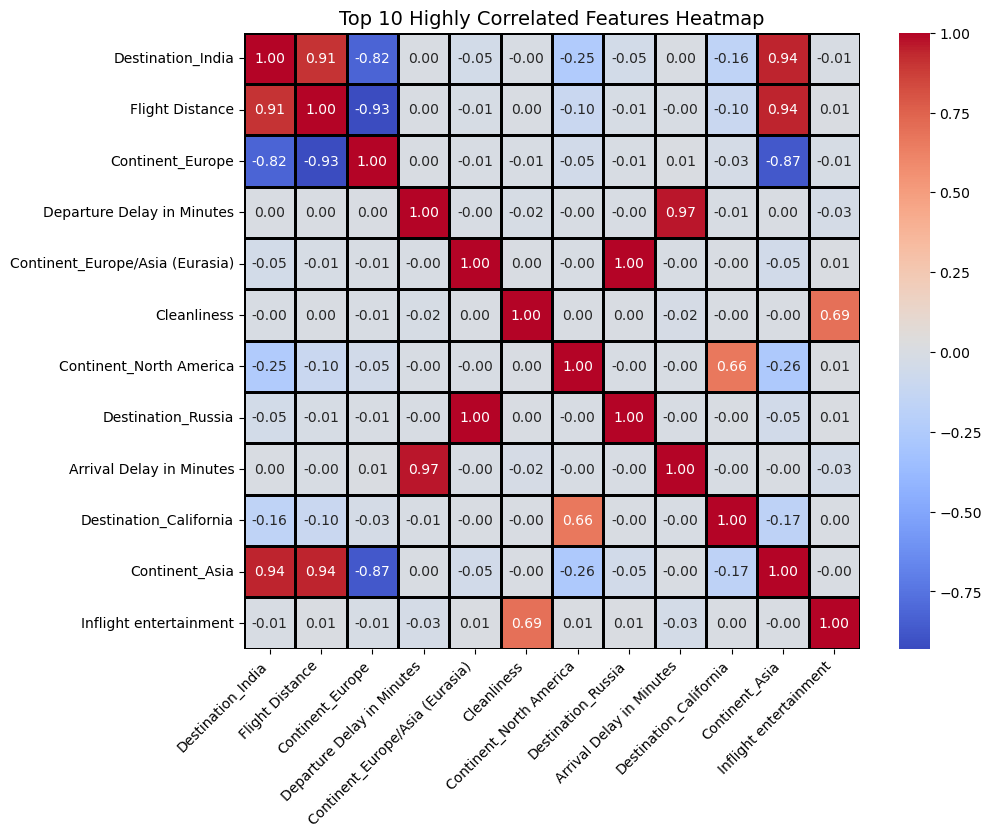

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    top_corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=1,
    linecolor='black',
    cbar=True,
    square=True
)
plt.title("Top 10 Highly Correlated Features Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

## EDA

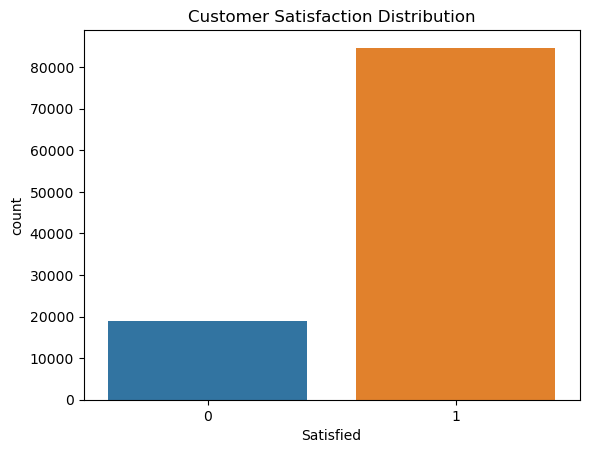

In [ ]:
sns.countplot(x='Satisfied', data=df)
plt.title('Customer Satisfaction Distribution')
plt.show()

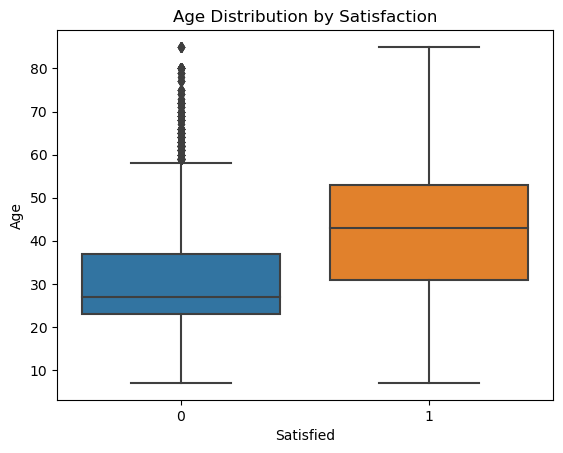

In [ ]:
sns.boxplot(x='Satisfied', y='Age', data=df)
plt.title('Age Distribution by Satisfaction')
plt.show()

In [ ]:
df['Satisfied'] = df['Satisfied'].astype(str)

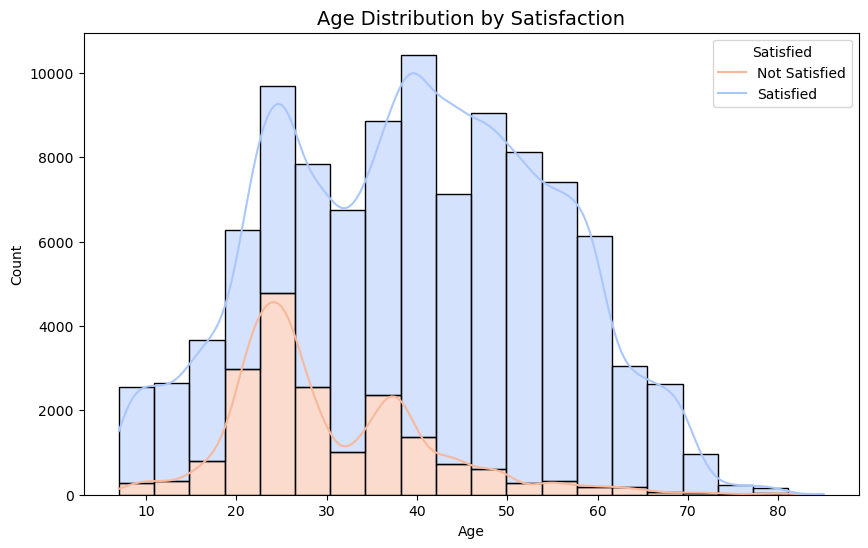

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x="Age", hue="Satisfied", bins=20, kde=True, multiple="stack", palette="coolwarm")

plt.title("Age Distribution by Satisfaction", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Satisfied", labels=["Not Satisfied", "Satisfied"])

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

X_train, X_test, y_train, y_test = train_test_split(df.drop('Satisfied', axis=1), df['Satisfied'], test_size=0.2, random_state=42)

## Random Forest

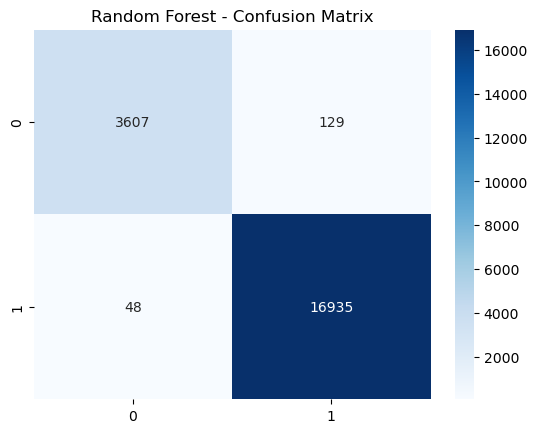

Random Forest - Accuracy: 0.99
Random Forest - Log Loss: 0.31
Random Forest - F1 Score: 0.99
Random Forest - Precision: 0.99
Random Forest - Recall: 1.00


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
log_loss_rf = log_loss(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

confusion_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest - Confusion Matrix')
plt.show()

print(f"Random Forest - Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest - Log Loss: {log_loss_rf:.2f}")
print(f"Random Forest - F1 Score: {f1_rf:.2f}")
print(f"Random Forest - Precision: {precision_rf:.2f}")
print(f"Random Forest - Recall: {recall_rf:.2f}")


## Decision Tree

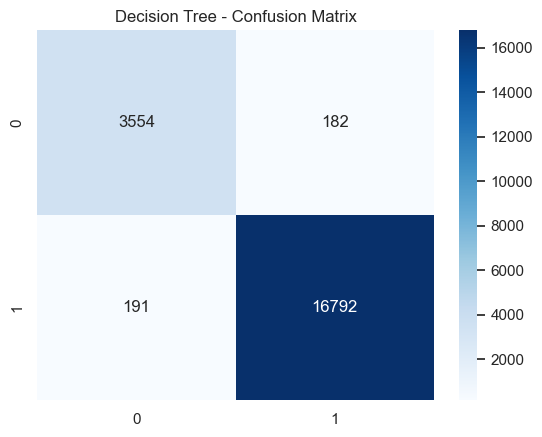

Decision Tree - Accuracy: 0.98
Decision Tree - Log Loss: 0.65
Decision Tree - F1 Score: 0.99
Decision Tree - Precision: 0.99
Decision Tree - Recall: 0.99


In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
log_loss_tree = log_loss(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree)
recall_tree = recall_score(y_test, y_pred_tree)

confusion_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(confusion_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree - Confusion Matrix')
plt.show()

print(f"Decision Tree - Accuracy: {accuracy_tree:.2f}")
print(f"Decision Tree - Log Loss: {log_loss_tree:.2f}")
print(f"Decision Tree - F1 Score: {f1_tree:.2f}")
print(f"Decision Tree - Precision: {precision_tree:.2f}")
print(f"Decision Tree - Recall: {recall_tree:.2f}")

## Model Comparison

In [ ]:
metrics = {
    'Model': ['Random Forest', 'Decision Tree'],
    'Accuracy': [accuracy_rf, accuracy_tree],
    'Log Loss': [log_loss_rf, log_loss_tree],
    'F1 Score': [f1_rf, f1_tree],
    'Precision': [precision_rf, precision_tree],
    'Recall': [recall_rf, recall_tree]
}

metrics_df = pd.DataFrame(metrics)

print("Summary Table of Accuracy Metrics:")
print(metrics_df)

Summary Table of Accuracy Metrics:
           Model  Accuracy  Log Loss  F1 Score  Precision    Recall
0  Random Forest  0.991457  0.307917  0.994801   0.992440  0.997174
1  Decision Tree  0.981997  0.648887  0.989016   0.989278  0.988753


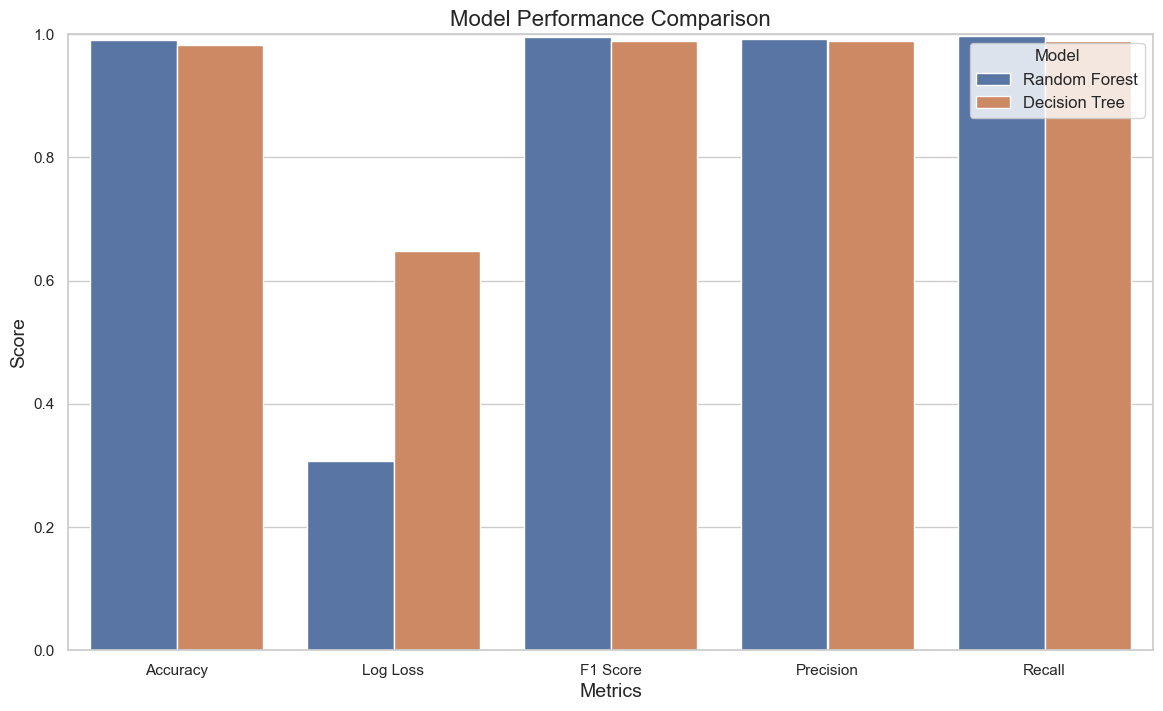

In [ ]:
sns.set(style='whitegrid')

plt.figure(figsize=(14, 8))

performance_df_melted = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

sns.barplot(x='Metric', y='Score', hue='Model', data=performance_df_melted)

plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1)
plt.legend(title='Model', fontsize=12)

plt.show()